# CHEMICAL SEGREGATION USING LOGISTIC REGRESSION


#### A chemist has two chemical flasks labelled 1 and 0 which contains two different chemicals. He extracted 3 features from these chemicals in order to distinguish between them. You are provided with the results derived by the chemist and your task is to create a model that will label chemical 0 or 1 given its three features.


## LOADING DATA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
X_train = pd.read_csv("C:\personal\data science\coding ninjas\chemical_classifier\Logistic_X_Train.csv")
y_train = pd.read_csv("C:\personal\data science\coding ninjas\chemical_classifier\Logistic_Y_Train.csv")
X_test = pd.read_csv("C:\personal\data science\coding ninjas\chemical_classifier\Logistic_X_Test.csv")

In [4]:
X_train.head(5)

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [60]:
y_train.head(5)

,label
0,1
1,1
2,1
3,0
4,0


In [13]:
data = X_train.values
target = y_train.values

In [16]:
target = target.reshape((3000,))

### The training data contains 3 features and target contains only binary values. Therefore logictic regression can be applied to this data set  

## VISUALISING THE DATA SET USING SCATTER PLOT


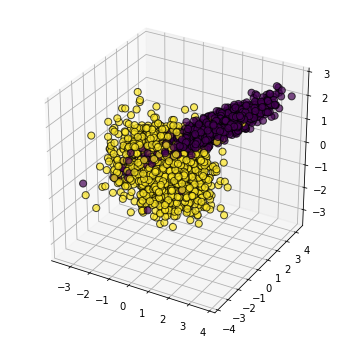

In [20]:
from mpl_toolkits.mplot3d import Axes3D
f1 = data[:,0]
f2 = data[:,1]
f3 = data[:,2]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1, f2, f3,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s= 50,
           c=target)
plt.show()

### The 2 clusters are identified by yellow and purple through visualisation

## TRAINING MODEL USING SKLEARN 

In [21]:
from sklearn.linear_model import LogisticRegression

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
model = LogisticRegression()
model = model.fit(data,target)

In [25]:
model.score(data,target)

0.9953333333333333

### The model trained using logistic regression has a prediction score of 99.5%. We will visulise the results to see predictions vs orignal values for training data.

In [31]:
pred = model.predict(data)

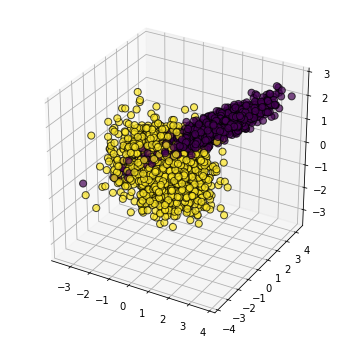

In [33]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(f1, f2, f3,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s= 50,
           c=pred)
plt.show()

### The prediction and orignal graph are very similar. Therefore our model has understood the data well. 

## PREDICTING VALUES FOR TEST DATA 

In [72]:
test_data = X_test.values

In [73]:
y_pred = model.predict(test_data)

In [74]:
y_pred.shape

(1000,)

### The binary values of 0 and 1 have been assigned to test features. One way to analyse our prediction is by visualising the results

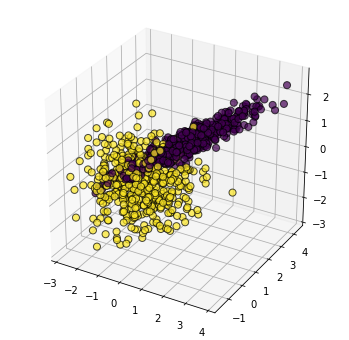

In [75]:
p1 = test_data[:,0]
p2 = test_data[:,1]
p3 = test_data[:,2]
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p1, p2, p3,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s= 50,
           c=y_pred)
plt.show()

### The visualisation indicates that predictions are done well. The next step is to save the predictions in csv format to prepare it for submission

In [76]:
submission = pd.DataFrame(y_pred, index = None)

In [78]:
submit = submission.to_csv("C:\personal\data science\coding ninjas\chemical_classifier\mysubmission2.csv")